Visualizing Car Sound (MFCC Coefficients 0-3):


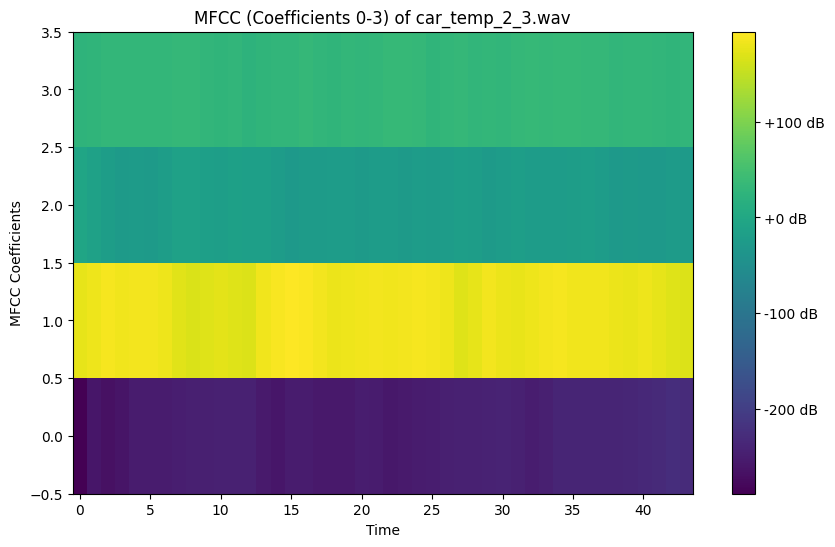

Visualizing No Car Sound (MFCC Coefficients 0-3):


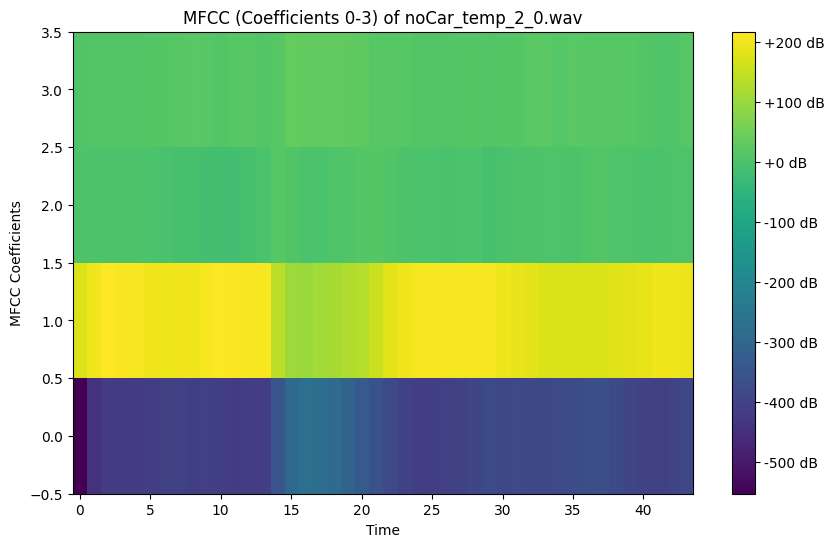

In [17]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 오디오 데이터를 읽고 특징 추출 (MFCC)
def extract_features(file_path, max_pad_len=44, target_sample_rate=16000, n_mfcc=40):
    # 오디오 데이터를 16kHz로 리샘플링
    audio, sample_rate = librosa.load(file_path, sr=target_sample_rate, res_type='kaiser_fast')
    # MFCC 추출
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    # 패딩 또는 자르기
    pad_width = max_pad_len - mfcc.shape[1]
    if pad_width > 0:
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc

# MFCC 시각화 함수 (특정 계수만 선택)
def visualize_mfcc(file_path, target_sample_rate=16000, max_pad_len=44, coeff_range=(0, 3)):
    # 특징 추출
    mfcc = extract_features(file_path, target_sample_rate=target_sample_rate, max_pad_len=max_pad_len)
    # 특정 범위의 MFCC 계수 선택
    selected_mfcc = mfcc[coeff_range[0]:coeff_range[1]+1, :]
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.imshow(selected_mfcc, interpolation='nearest', aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"MFCC (Coefficients {coeff_range[0]}-{coeff_range[1]}) of {os.path.basename(file_path)}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()

# 사용자 정의 경로
car_file = "C:\\3-2\\p\\soundDetection\\data\\splitCar\\car_temp_2_3.wav"  # 자동차 소리가 있는 파일
no_car_file = "C:\\3-2\\p\\soundDetection\\data\\splitNoCar\\noCar_temp_2_0.wav"  # 자동차 소리가 없는 파일

# 자동차 소리 시각화 (MFCC 계수 0~3)
print("Visualizing Car Sound (MFCC Coefficients 0-3):")
visualize_mfcc(car_file, coeff_range=(0, 3))

# 비자동차 소리 시각화 (MFCC 계수 0~3)
print("Visualizing No Car Sound (MFCC Coefficients 0-3):")
visualize_mfcc(no_car_file, coeff_range=(0, 3))


Visualizing Car Sound:


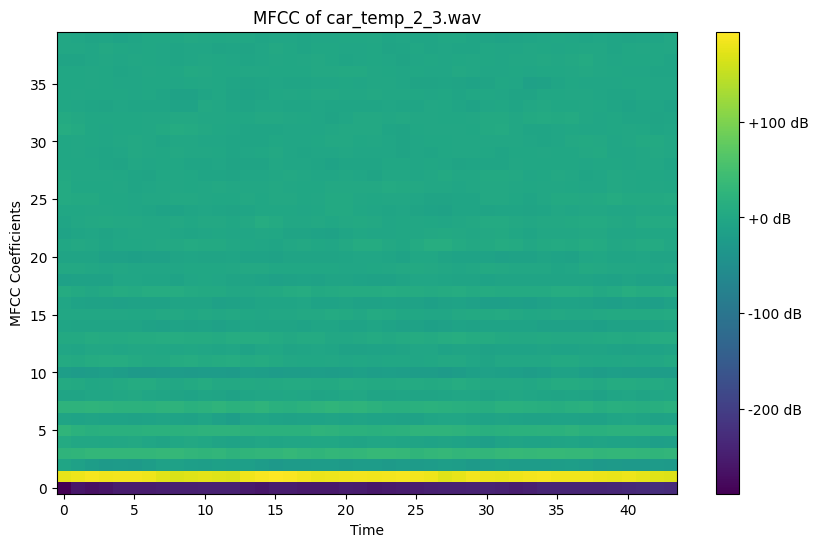

Visualizing No Car Sound:


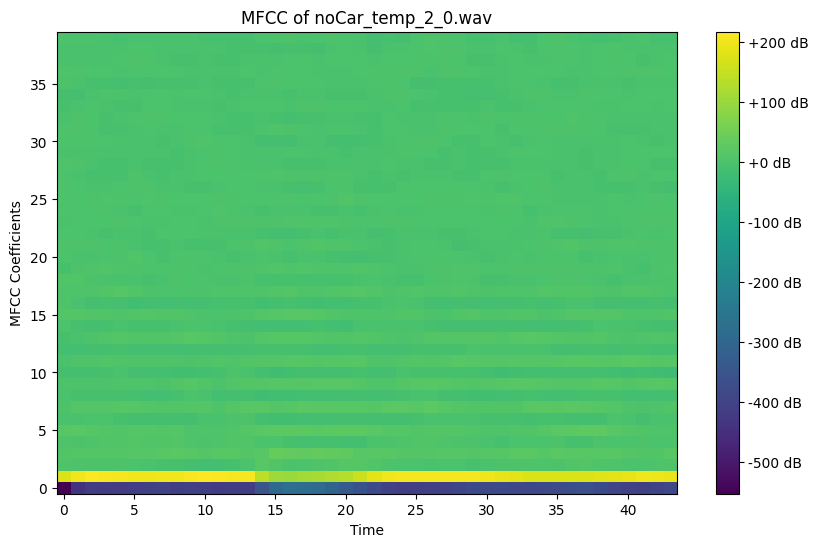

In [20]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 오디오 데이터를 읽고 특징 추출 (MFCC)
def extract_features(file_path, max_pad_len=44, target_sample_rate=16000):
    # 오디오 데이터를 16kHz로 리샘플링
    audio, sample_rate = librosa.load(file_path, sr=target_sample_rate, res_type='kaiser_fast')
    # MFCC 추출
    mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    # 패딩 또는 자르기
    pad_width = max_pad_len - mfcc.shape[1]
    if pad_width > 0:
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :max_pad_len]
    return mfcc

# MFCC 시각화 함수
def visualize_mfcc(file_path, target_sample_rate=16000, max_pad_len=44):
    # 특징 추출
    mfcc = extract_features(file_path, target_sample_rate=target_sample_rate, max_pad_len=max_pad_len)
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.imshow(mfcc, interpolation='nearest', aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"MFCC of {os.path.basename(file_path)}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()

# 사용자 정의 경로
car_file = "C:\\3-2\\p\\soundDetection\\data\\splitCar\\car_temp_2_3.wav"  # 자동차 소리가 있는 파일
no_car_file = "C:\\3-2\\p\\soundDetection\\data\\splitNoCar\\noCar_temp_2_0.wav"  # 자동차 소리가 없는 파일

# 자동차 소리 시각화
print("Visualizing Car Sound:")
visualize_mfcc(car_file)

# 비자동차 소리 시각화
print("Visualizing No Car Sound:")
visualize_mfcc(no_car_file)
